# Supreme Court Justice Stevens’ Decisions
### Shan Wang
### 29 August, 2022
## 1 Loading and Exploring the Data Set

In [1]:
import pandas as pd

stevens = pd.read_csv('Stevens.csv')
stevens.info()
stevens.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  566 non-null    int64 
 1   Docket      566 non-null    object
 2   Term        566 non-null    int64 
 3   Circuit     566 non-null    object
 4   Issue       566 non-null    object
 5   Petitioner  566 non-null    object
 6   Respondent  566 non-null    object
 7   LowerCourt  566 non-null    object
 8   Unconst     566 non-null    int64 
 9   Reverse     566 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 44.3+ KB


,Unnamed: 0,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,1,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,2,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,3,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,4,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,5,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


We tranform the following variables to multiple dummy variables in Python, because sklearn can only deal with numerical data when fitting CART model.

In [2]:
stevens=stevens.drop('Docket',1)
stevens1 = pd.get_dummies(stevens)
stevens1.info()
stevens1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              566 non-null    int64
 1   Term                                    566 non-null    int64
 2   Unconst                                 566 non-null    int64
 3   Reverse                                 566 non-null    int64
 4   Circuit_10th                            566 non-null    uint8
 5   Circuit_11th                            566 non-null    uint8
 6   Circuit_1st                             566 non-null    uint8
 7   Circuit_2nd                             566 non-null    uint8
 8   Circuit_3rd                             566 non-null    uint8
 9   Circuit_4th                             566 non-null    uint8
 10  Circuit_5th                             566 non-null    uint8
 11  Circuit_6th        

C:\Users\Administrator\Temp\ipykernel_38596\1957816815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stevens=stevens.drop('Docket',1)


,Unnamed: 0,Term,Unconst,Reverse,Circuit_10th,Circuit_11th,Circuit_1st,Circuit_2nd,Circuit_3rd,Circuit_4th,...,Respondent_EMPLOYEE,Respondent_EMPLOYER,Respondent_GOVERNMENT.OFFICIAL,Respondent_INJURED.PERSON,Respondent_OTHER,Respondent_POLITICIAN,Respondent_STATE,Respondent_US,LowerCourt_conser,LowerCourt_liberal
0,1,1994,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1994,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1994,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1994,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We convert the following variables to the “category” type in Python. We should convert the variable Term because we do not want to enforce any increasing or decreasing pattern in the change of decision probabilities across the years.

In [3]:
stevens1 = stevens1.astype('category') 
stevens1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Unnamed: 0                              566 non-null    category
 1   Term                                    566 non-null    category
 2   Unconst                                 566 non-null    category
 3   Reverse                                 566 non-null    category
 4   Circuit_10th                            566 non-null    category
 5   Circuit_11th                            566 non-null    category
 6   Circuit_1st                             566 non-null    category
 7   Circuit_2nd                             566 non-null    category
 8   Circuit_3rd                             566 non-null    category
 9   Circuit_4th                             566 non-null    category
 10  Circuit_5th                             566 non-nu

## 2 Splitting the Data Set for Training and Testing

We will randomly split the data set into a training set and a testing set, using the ‘train_test_split’ function in the “sklearn” package.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X =  stevens1.drop('Reverse',1)
y =  stevens1.loc[:,'Reverse']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=3000)

C:\Users\Administrator\Temp\ipykernel_38596\1472450694.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X =  stevens1.drop('Reverse',1)


## 3 Building a Classification and Regression Tree (CART) Model

Before building our CART model, we need to install and load a new package, `DecisionTreeClassifier `.

In [6]:
from sklearn.tree import DecisionTreeClassifier 

Now we are ready to build our model.

In [7]:
stevensTree = DecisionTreeClassifier(min_samples_leaf=5, random_state=100)
#criterion: {"gini", "entropy"} default="gini"
#max_depth: The maximum depth of the tree.
#min_samples_split: The minimum number of samples required to split an internal node
#min_samples_leaf: The minimum number of samples required to be at a leaf node.
#max_leaf_nodes: The maximum number of leaf nodes
#ccp_alpha: penalty

model = stevensTree.fit(X_train,y_train)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [9]:
#if there is error
#!pip install --upgrade scikit-learn
#restart the kernel and check the version
#import sklearn
#print(sklearn.__version__)

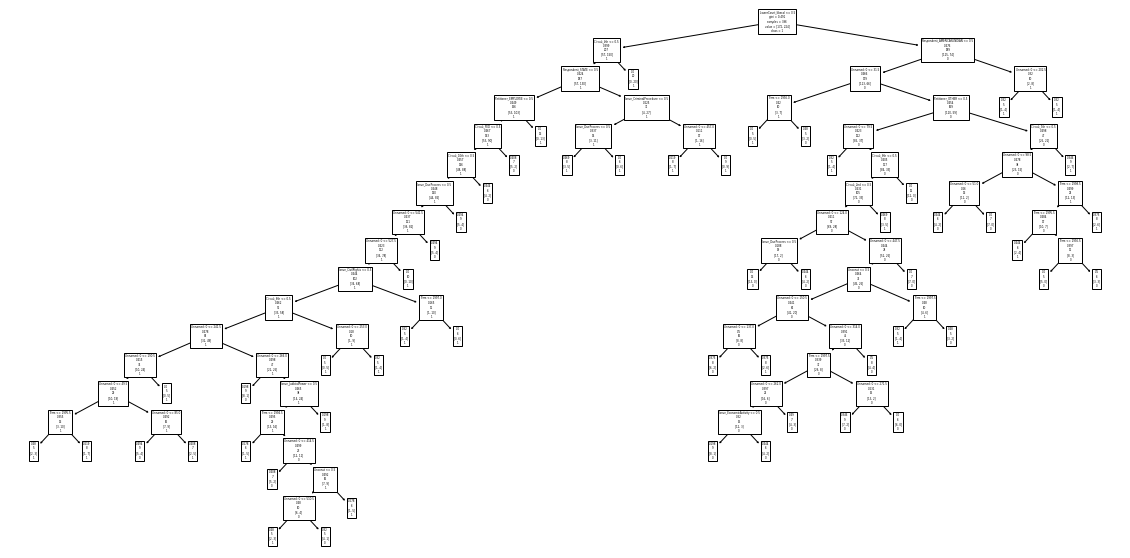

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names = X_train.columns, class_names = ['0','1'], label='root')
plt.show()

Let us evaluate the prediction accuracy of our CART model.

In [11]:
predictCART = stevensTree.predict(X_test)
conf1 = pd.crosstab(index = y_test,  
columns=predictCART, colnames=['predictCART'])
conf1

predictCART,0,1
Reverse,,
0,41,44
1,23,62


Accuracy is 104/170 = 61.18%. Or directly use `.score` function:

In [12]:
stevensTree.score(X_test,y_test)

0.6058823529411764

The above codes use a threshold of 0.5 to create the confusion matrix. By default, we typically use 0.5 as the threshold value for a CART model as the classification is mainly encoded in the tree structure, and each leaf node is supposed to contain similar observations.

The accuracy of our CART model is 61.18%, which is much higher compared to the accuracy of the baseline model that always predicts ‘Reverse’, 55%.

If you prefer to use a different threshold, you can ask the `predict_proba` function to predict the probabilities instead of classes, and then manually set a threshold to create the confusion matrix.

In [13]:
predictCART2 = stevensTree.predict_proba(X_test)

The prediction outcome variable, predictCART2, is a 170 by 2 matrix, as checked below.

In [14]:
predictCART2.shape

(170, 2)

Let us take a look at the first 20 rows of predictCART2.

In [15]:
predictCART2[1:20,:]

array([[0.25      , 0.75      ],
       [0.22222222, 0.77777778],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.4       , 0.6       ],
       [0.2       , 0.8       ],
       [0.2       , 0.8       ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.        , 1.        ]])

The first column is the percentage of training set data having outcome 0 in the same subset (leaf node) as the test set observation. The second column is the percentage of training set data having outcome 1 in the same subset (leaf node) as the test set observation. We could interpret the second column as the probability that the test set observation has outcome 1. 

！！！Note that the index for each row is not continuous from 1 to 20. Instead, it is the index of each data point in the original dataset before random sampling into training and test sets. In other words, the first case, third case, forth case, etc., of the original dataset are randomly selected to be included in the test set.

Now, we can generate the confusion matrix as before by supplying any threshold we want. Using 0.5 as the threshold will recover the confusion matrix we got before.

In [16]:
pd.crosstab(index = y_test,  
columns=(predictCART2>0.5)[: , 1], colnames=['predictCART2>0.5'])

predictCART2>0.5,False,True
Reverse,,
0,41,44
1,23,62


We can also generate the ROC curve for our CART model, and compute its AUC.

In [17]:
from sklearn.metrics import roc_curve

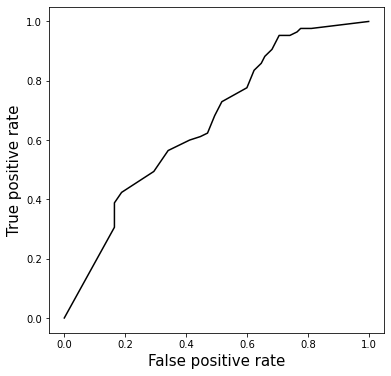

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, predictCART2[: , 1])

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='black')
plt.xlabel('False positive rate' ,fontdict={'size':15})
plt.ylabel('True positive rate' , fontdict={'size':15})
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictCART2[: , 1])
auc

0.6593771626297578

## 3.2 Using Cross-Validation to Select a Complexity Parameter

Let us try cross-validation for our CART model. To do this, we need to install and load a new package, `StratifiedShuffleSplit`, which is a kind of cross-validation. 

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

Now, we will define our cross-validation experiment. First, we define how many folds we want.

In [21]:
fitControl = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=33)

The first argument, `n_splits=10`, tells the number of re-shuffling & splitting iterations is 10.

`test_size=0.3` means that the portion of data for validation is 30%.

The third argument synchronize the results by setting a common random seed first, because there is some random component in k-fold cross-validation—random partition into k folds.

Next, we need to pick the possible values for our parameter `min_impurity_decrease`. 

`impurity=0` means that all samples in a node are from same class. 

If the splitting of a node results in a reduction in impurity (the sample is purer after splitting than before splitting) greater than or equal to `min_impurity_decrease`, the node is split.

Larger `min_impurity_decrease` (higher penalty on each split) leads to a smaller tree: `min_impurity_decrease` = 1 will result in a tree with no splits, i.e., the smallest tree; equivalent to set `max_depth = 0`;

Smaller `min_impurity_decrease` (lower penalty on each split) leads to a bigger tree: `min_impurity_decrease` = 0 will result in a tree with each data point as a leaf node, i.e., the biggest tree; equivalent to set `max_depth = None`.

We usually do not need to explore the whole range of `min_impurity_decrease` values from 0 to 1. In most cases, we only need a small value of `min_impurity_decrease`, e.g., from 0.001 through 0.1 with a step size of 0.005.

In [22]:
import numpy as np

mid = np.arange(0,0.1,0.005)
param_grid = dict(min_impurity_decrease =  mid)
#generate a series of `min_impurity_decrease`

Now, we are ready to perform cross-validation.

In [23]:
# Applying Grid Search to find the best model and the best parameters
# It takes several seconds
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = stevensTree, 
param_grid = param_grid,
scoring = 'accuracy',
cv = fitControl,
)
stevensTreeCV = grid_search.fit(X_train, y_train)

In [24]:
means = stevensTreeCV.cv_results_['mean_test_score']
params = stevensTreeCV.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

0.609244  with:   {'min_impurity_decrease': 0.0}
0.615966  with:   {'min_impurity_decrease': 0.005}
0.664706  with:   {'min_impurity_decrease': 0.01}
0.678992  with:   {'min_impurity_decrease': 0.015}
0.678992  with:   {'min_impurity_decrease': 0.02}
0.679832  with:   {'min_impurity_decrease': 0.025}
0.679832  with:   {'min_impurity_decrease': 0.03}
0.679832  with:   {'min_impurity_decrease': 0.035}
0.679832  with:   {'min_impurity_decrease': 0.04}
0.679832  with:   {'min_impurity_decrease': 0.045}
0.626050  with:   {'min_impurity_decrease': 0.05}
0.579832  with:   {'min_impurity_decrease': 0.055}
0.570588  with:   {'min_impurity_decrease': 0.06}
0.563025  with:   {'min_impurity_decrease': 0.065}
0.563025  with:   {'min_impurity_decrease': 0.07}
0.563025  with:   {'min_impurity_decrease': 0.075}
0.563025  with:   {'min_impurity_decrease': 0.08}
0.563025  with:   {'min_impurity_decrease': 0.085}
0.563025  with:   {'min_impurity_decrease': 0.09}
0.563025  with:   {'min_impurity_decrease'

In [25]:
stevensTreeCV.best_estimator_

DecisionTreeClassifier(min_impurity_decrease=0.025, min_samples_leaf=5,
                       random_state=100)

The above output tells the optimal `min_impurity_decrease` value we would like to use to build our CART model, which we will do next to build a new CART model. 

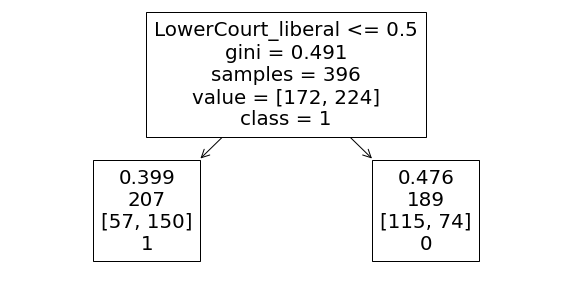

In [26]:
plt.figure(figsize=(10,5))

tree.plot_tree(stevensTreeCV.best_estimator_, feature_names = X_train.columns, class_names = ['0','1'], label='root')
plt.show()

Interestingly, the best tree selected from the cross-validation procedure using the `min_impurity_decrease` parameter has only one split on the ideological direction of lower court decision. When the lower court decision was considered liberal, Justice Stevens was more likely to affirm the decision. When the lower court decision was considered conservative, however, Justice Stevens was more likely to reverse the decision. As shown below, this simple tree has about 68% accuracy. This provides a strong evidence that Justice Stevens was more liberal than conservative, as opposed to what he claimed for himself.

In [27]:
predictCV = grid_search.predict(X_test)
confCV = pd.crosstab(index = y_test,  
columns=predictCV, colnames=['predictCV'])
confCV

predictCV,0,1
Reverse,,
0,56,29
1,28,57


In [28]:
grid_search.score(X_test,y_test)

0.6647058823529411

The accuracy of the new CART model is 66.47%, which is higher compared to accuracy of our previous CART model, 61.18%. We will see that it is lower compared to the naive random forest model that we will develop next.

### 3.3 Cross-Validation with Another Package in Python

If you have problems with the `StratifiedShuffleSplit` package, there are other packages available in Python to conduct k-fold cross-validation for CART, e.g., the `cross_val_score` package. The general idea is the same, but some details are different in different packages. For example, the definitions of performance measures and the choices of parameters are different in the `cross_val_score` package. See below for some example code using the `cross_val_score` package. You can see that although it does not use complexity parameter or accuracy as the performance measure, the optimal tree it finds is the same as the one we got before. You can find a more detailed manual and discussion about this and other packages online.

In [29]:
from sklearn.model_selection import cross_val_score	

In [30]:
score = []
alphas = []
for alpha in range(1,30,1):
    alphas.append(alpha)
    clf = DecisionTreeClassifier(max_depth=alpha)
    rs = np.sqrt(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 3)) #try other scoring criteria: recall etc.
    score.append(rs.mean())

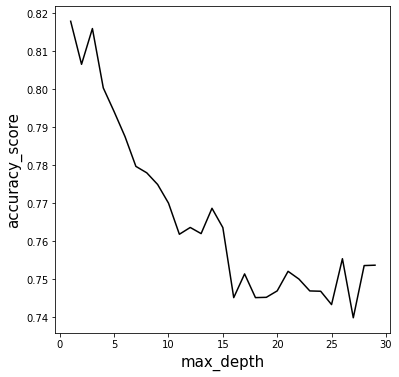

In [31]:
plt.figure(figsize=(6,6))
plt.plot(alphas,score, c = 'black')
plt.xlabel('max_depth', fontdict={'size':15})
plt.ylabel('accuracy_score', fontdict={'size':15})
plt.show()

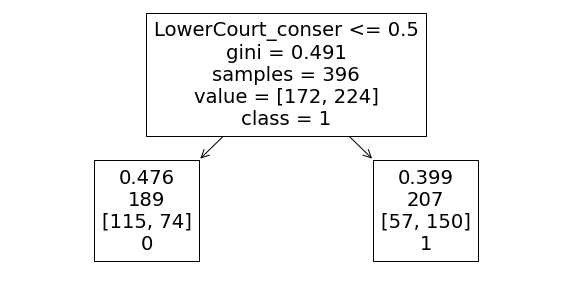

In [32]:
plt.figure(figsize=(10,5))

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)
tree.plot_tree(clf, feature_names = X_train.columns, class_names = ['0','1'], label='root')
plt.show()

## 4 Building a Random Forest Model

We first need to install and load a new package, called `RandomForestClassifier`.

In [33]:
from sklearn.ensemble import RandomForestClassifier

Now let us try to build a random forest model.

In [34]:
stevensForest = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, random_state=100) # n_estimators :The number of trees in the forest.
stevensForest.fit(X_train, y_train) 

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=100)

We can now generate the confusion matrix from our random forest model.

In [35]:
predictForest = stevensForest.predict(X_test)

In [36]:
confRF = pd.crosstab(index = y_test,  
columns=predictForest, colnames=['predictRF'])
confRF

predictRF,0,1
Reverse,,
0,48,37
1,16,69


In [37]:
stevensForest.score(X_test,y_test)

0.6882352941176471

The accuracy of our random forest model is 70%, which is much higher to the accuracy of the CART model from cross-validation. You can further finetune the model using cross-validation to choose the best parameter values.